In [213]:
from skimage import data
from skimage.feature import Cascade
import matplotlib.pyplot as plt
import cv2 as cv 
import numpy as np
import cv2
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import pickle
from IPython.display import clear_output
import time

### Wczytywany model wytrenowany o dane z folderów positive i negative

Obraz do rozpatrywania, o rozmiarach: (979, 1632, 3)


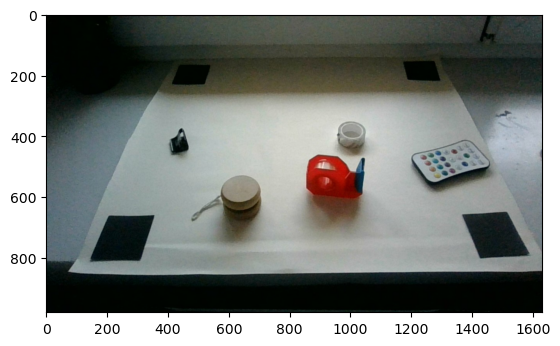

Liczba wykrytych elementów: 10, o koordynatach: 
[[ 391  371  151  151]
 [ 823  464  243  243]
 [ 412  150   92   92]
 [1414   22  116  116]
 [ 549  571  202  202]
 [1161  109  132  132]
 [1372  654  168  168]
 [ 153  672  149  149]
 [1195  478   94   94]
 [ 941  352  126  126]]


In [246]:
model=cv.CascadeClassifier('C:/Users/ADMIN/Desktop/Digital_Twin/008_cascade_classifier/cascade/cascade.xml')
#Obraz który będzie rozpatrywany:
img=plt.imread('C:/Users/ADMIN/Desktop/Digital_Twin/test/WIN_20221227_15_10_42_Pro.jpg')
img=cv.resize(img,None, fx=1632/1280,fy=979/720)
print('Obraz do rozpatrywania, o rozmiarach: {}'.format(img.shape))
plt.imshow(img)
plt.show()
processed=model.detectMultiScale(img)
print('Liczba wykrytych elementów: {}, o koordynatach: \n{}'.format(len(processed),processed))

### Funkcja która z listy koordynatów zwróci konkretnie przypisane wierzchołki, odrzucajac te poza przedziałami akceptowalności

In [247]:
def select(cords):
    lista=[1,2,3,4]
    for elem in cords:
        if elem[0]<450 and elem[1]<270:
            lista[0]=((elem[0],elem[1],elem[2]))
        elif elem[0]>1000 and elem[1]<270:
            lista[1]=(((elem[0],elem[1],elem[2])))
        elif elem[0]<450 and elem[1]>550:
            lista[2]=(((elem[0],elem[1],elem[2])))
        elif elem[0]>1200 and elem[1]>450:
            lista[3]=(((elem[0],elem[1],elem[2])))
    return lista
param=select(processed)
print('Koordynaty rogów magazynu {}'.format(param))

Koordynaty rogów magazynu [(412, 150, 92), (1161, 109, 132), (153, 672, 149), (1372, 654, 168)]


### Wyświtla pierwsze 4 znalezione elementy

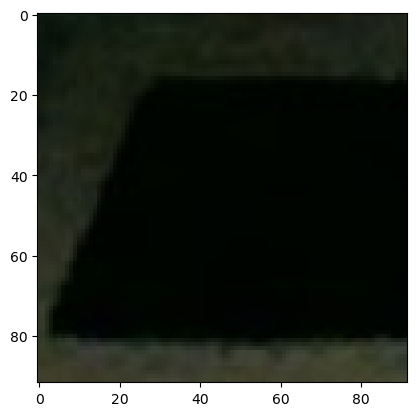

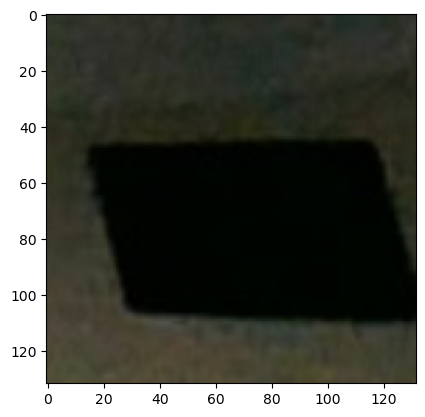

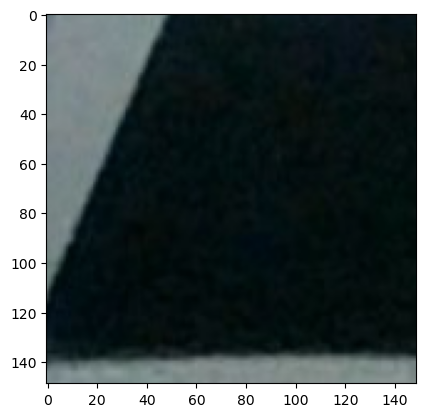

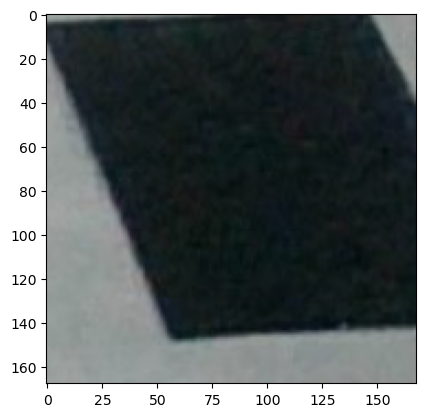

In [248]:
for elem in range(len(param)):
    a=param[elem]
    a1=a[0]
    b1=a[1]
    c1=a[2]
    d1=a[2]

    #img1=img[1:100,10:110]
    img1=img[b1:b1+d1,a1:a1+c1]

    plt.imshow(img1)
    plt.show()

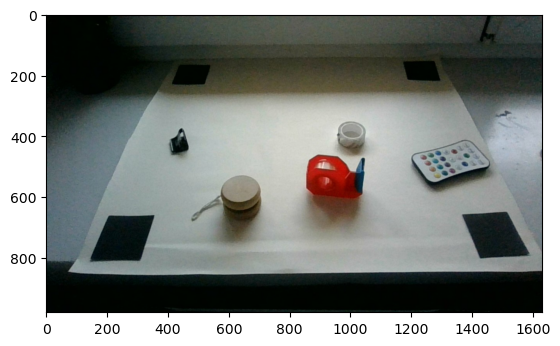

Liczba wykrytych elementów: 22, o koordynatach: 
[[ 855  463  138  138]
 [1201  432  149  149]
 [ 567  599  146  146]
 [ 407  388   75   75]
 [ 956  351  112  112]
 [1172   90  174  174]
 [1435   16   68   68]
 [ 165  680  134  134]
 [1324  491   73   73]
 [1411  671  130  130]
 [1405  324   70   70]
 [ 863  508  177  177]
 [1427   28   86   86]
 [ 413  123  138  138]
 [ 573  544  139  139]
 [1420   15  170  170]
 [1345   99  190  190]
 [ 381  281  479  479]
 [1364  428  119  119]
 [1327  368  134  134]
 [1290   60  138  138]
 [ 132  360  488  488]]


In [249]:
#wykrywanie potencjalnych robotów
model_rb=cv.CascadeClassifier('C:/Users/ADMIN/Desktop/Digital_Twin/008_cascade_classifier_robot/cascade/cascade.xml')
img_rb=img
plt.imshow(img_rb)
plt.show()
processed=model_rb.detectMultiScale(img_rb)
print('Liczba wykrytych elementów: {}, o koordynatach: \n{}'.format(len(processed),processed))

In [250]:
rb_znal=[]
for elem in range(len(processed)):
    a=processed[elem]
    a1=a[0]
    b1=a[1]
    c1=a[2]
    d1=a[3]

    #img1=img[1:100,10:110]
    img1=img_rb[b1:b1+d1,a1:a1+c1]
    rb_znal.append(img1)

### Otrzymane obrazy zamienia w średnią kolorów

In [251]:
wszystkie=[]
for elem in rb_znal:
    mean_matrix=[]
    for index in range(3):
        suma=0
        licz=0
        for el in elem:
            for i in el:
                suma=suma+i[index]
                licz=licz+1
        mean_matrix.append(int(suma/licz))
    wszystkie.append(mean_matrix)
print(wszystkie)

[[157, 50, 39], [120, 129, 129], [93, 88, 71], [79, 91, 89], [153, 153, 144], [42, 44, 33], [34, 40, 36], [16, 28, 28], [83, 90, 90], [22, 31, 32], [121, 130, 133], [119, 52, 39], [35, 42, 37], [29, 34, 23], [110, 104, 86], [36, 44, 40], [41, 47, 41], [166, 170, 163], [116, 125, 126], [139, 147, 149], [38, 43, 37], [128, 140, 138]]


### W znalezionyk propozycjach 'robotów' sprawdzamy który z nich najbardziej odpowiada jego 
### kolorowi (który jest najbardziej czerwony), zapisuje jego koordynaty

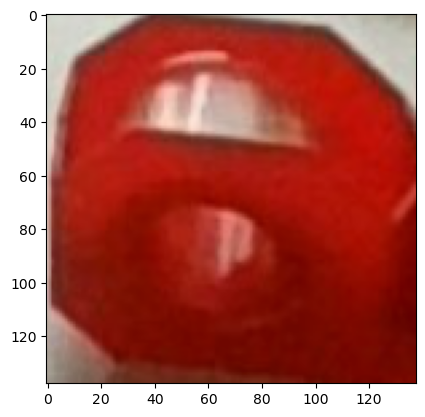

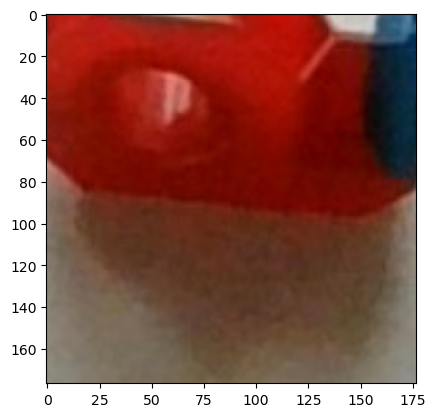

In [252]:
a=0
img_robot=[]
robot_kord=[]
for elem in wszystkie:
    #if (elem[0]>=200 and elem[1]+elem[2]<240) or (elem[0]>=140 and elem[1]+elem[2]<150):
    if (0.7*elem[0] < elem[1]+elem[2]) and (1.15*elem[0]> elem[1]+elem[2]) and (elem[0]+elem[1]+elem[2]>200) or (0.4*elem[0] < elem[1]+elem[2]) and (1.15*elem[0]> elem[1]+elem[2]) and (elem[0]+elem[1]+elem[2]>160):

        plt.imshow(rb_znal[a])
        plt.show()
        img_robot.append(rb_znal[a])
        robot_kord.append(processed[a])
    a=a+1
if robot_kord==[]:
    print('brak robota')

### Odnajdowanie punktów w rogu magazynu
### Punkty odnalezione na zdjęciu przypisz do trapeza w którym będzie szukany robot

In [253]:
path_map='C:/Users/ADMIN/Desktop/Digital_Twin/mapa.png'
path_robot='C:/Users/ADMIN/Desktop/Digital_Twin/robot.png'
lg={'r': param[0][1], 'c': param[0][0], 'width': param[0][2], 'height': param[0][2]}
pg={'r': param[1][1], 'c': param[1][0], 'width': param[1][2], 'height': param[1][2]}
ld={'r': param[2][1], 'c': param[2][0], 'width': param[2][2], 'height': param[2][2]}
pd={'r': param[3][1], 'c': param[3][0], 'width': param[3][2], 'height': param[3][2]}
rb={'r': robot_kord[0][1], 'c': robot_kord[0][0], 'width': robot_kord[0][2], 'height': robot_kord[0][3]}
lg,pg,ld,pd,rb

({'r': 150, 'c': 412, 'width': 92, 'height': 92},
 {'r': 109, 'c': 1161, 'width': 132, 'height': 132},
 {'r': 672, 'c': 153, 'width': 149, 'height': 149},
 {'r': 654, 'c': 1372, 'width': 168, 'height': 168},
 {'r': 463, 'c': 855, 'width': 138, 'height': 138})

In [254]:
A=1500
h=ld['r']+ld['height']-rb['r']
H=ld['r']+ld['height']-lg['r']
y=lg['c']-ld['c']
S=int(abs((h/H)*A-A))
x=y*(1-h/H)

a=rb['c']-ld['c']-x
d=pd['c']+pd['width']-ld['c']-2*x
Z=int(A*a/d)
#współrzędne na mapie
(Z,S)

(761, 699)

### Ostateczny wynik

Pierwotny obraz:


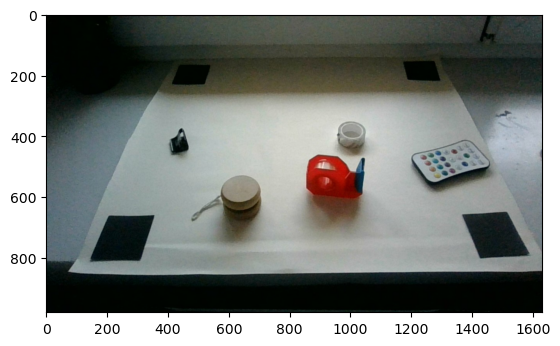

Obraz na mapie:


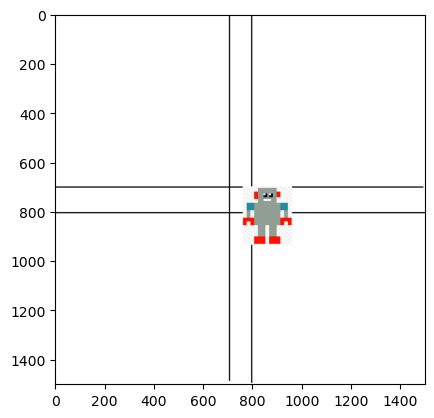

In [255]:
mapa=plt.imread(path_map)
robot=plt.imread(path_robot)
mapa[S:S+robot.shape[0],Z:Z+robot.shape[1]] =robot
print('Pierwotny obraz:')
plt.imshow(img)
plt.show()
print('Obraz na mapie:')
plt.imshow(mapa)
plt.show()

# Wersja odczytywania danych na żywo z kamery

In [ ]:
vid = cv2.VideoCapture(0)
  
while(True):
      
    ret, frame = vid.read()
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame=cv.resize(frame,None, fx=1632/640,fy=979/480)
    mapa1=frame

    rb_znal=[]
    img_rb=frame
    processed=model.detectMultiScale(frame)
    param=select(processed)
    print(param)
    if type(param[0])==type(param[1])==type(param[2])==type(param[3]):
        for elem in range(len(processed)):
            a=processed[elem]
            a1=a[0]
            b1=a[1]
            c1=a[2]
            d1=a[3]

            img1=img_rb[b1:b1+d1,a1:a1+c1]
        processed=model_rb.detectMultiScale(frame)
        for elem in range(len(processed)):
            a=processed[elem]
            a1=a[0]
            b1=a[1]
            c1=a[2]
            d1=a[3]

            img1=img_rb[b1:b1+d1,a1:a1+c1]
            rb_znal.append(img1)
    #         plt.imshow(img1)
    #         plt.show()
        wszystkie=[]
        for elem in rb_znal:
            mean_matrix=[]
            for index in range(3):
                suma=0
                licz=0
                for el in elem:
                    for i in el:
                        suma=suma+i[index]
                        licz=licz+1
                mean_matrix.append(int(suma/licz))
            wszystkie.append(mean_matrix)
        a=0
        robot_kord=[]
        img_robot=[]
        for elem in wszystkie:
            #if (elem[0]>=200 and elem[1]+elem[2]<240) or (elem[0]>=140 and elem[1]+elem[2]<150):
            if (0.7*elem[0] < elem[1]+elem[2]) and (1.15*elem[0]> elem[1]+elem[2]) and (elem[0]+elem[1]+elem[2]>200) or (0.57*elem[0] < elem[1]+elem[2]) and (1.15*elem[0]> elem[1]+elem[2]) and (elem[0]+elem[1]+elem[2]>160):

                robot_kord.append(processed[a])
                img_robot.append(rb_znal[a])

            a=a+1
        if img_robot==[]:
            print('Nie znaleziono robota')
        else:
            lg={'r': param[0][1], 'c': param[0][0], 'width': param[0][2], 'height': param[0][2]}
            pg={'r': param[1][1], 'c': param[1][0], 'width': param[1][2], 'height': param[1][2]}
            ld={'r': param[2][1], 'c': param[2][0], 'width': param[2][2], 'height': param[2][2]}
            pd={'r': param[3][1], 'c': param[3][0], 'width': param[3][2], 'height': param[3][2]}
            rb={'r': robot_kord[0][1], 'c': robot_kord[0][0], 'width': robot_kord[0][2], 'height': robot_kord[0][3]}


            A=1500
            h=ld['r']+ld['height']-rb['r']
            H=ld['r']+ld['height']-lg['r']#-lg['height']
            y=lg['c']-ld['c']
            S=int(abs((h/H)*A-A))
            x=y*(1-h/H)

            a=rb['c']-ld['c']-x
            d=pd['c']+pd['width']-ld['c']-2*x
            Z=int(A*a/d)

            mapa=plt.imread(path_map)
            mapa1=mapa
            mapa[S:S+robot.shape[0],Z:Z+robot.shape[1]] =robot
            clear_output(wait=True)
            print('Współrzędnie punktów na rogach magazynu {}'.format(wszystkie))
            plt.imshow(frame)
            plt.show()
            plt.imshow(mapa)
            plt.show()